In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import stations
import config

import matplotlib.pyplot as plt
import numpy as np

In [4]:
config.setupMatPlotLib()

In [5]:
def cov(longitude):
    return np.array([max(0,np.cos(np.pi/180*(i-longitude))) for i in range(-180,181,1)])

def EV0(longitude):
    if not longitude % 180:
        return ""
    if longitude < 0:
        return "W"
    else:
        return "E"

In [6]:
date = 2022, 1, 1
my_stations = stations.getStations(*date)
longs = [i.longitude for i in my_stations]

cov_tot = sum([cov(i) for i in longs])

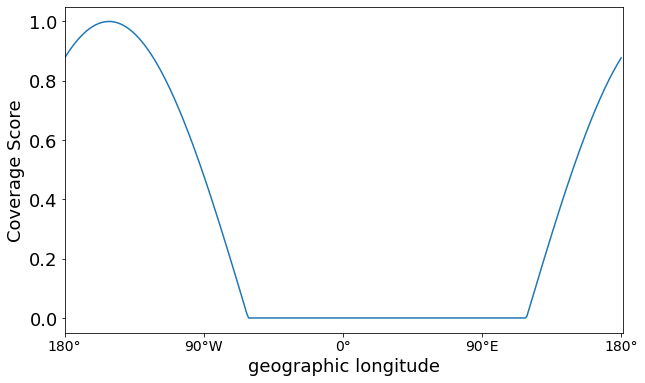

In [13]:
x_min = -180
x_max = 181
x_steps_plot_small = 90
plt.figure(figsize=(10,6))
plt.plot([i for i in range(x_min,x_max)], cov(longs[0]))
plt.xlim(x_min,x_max)
plt.xlabel("geographic longitude")
plt.ylabel("Coverage Score")
plt.xticks(range(x_min,x_max,x_steps_plot_small), [f"{abs(i)}°{EV0(i)}" for i in range(x_min,x_max,x_steps_plot_small)])
plt.savefig("station_distribution_20220101_single_-151.png")
plt.show()

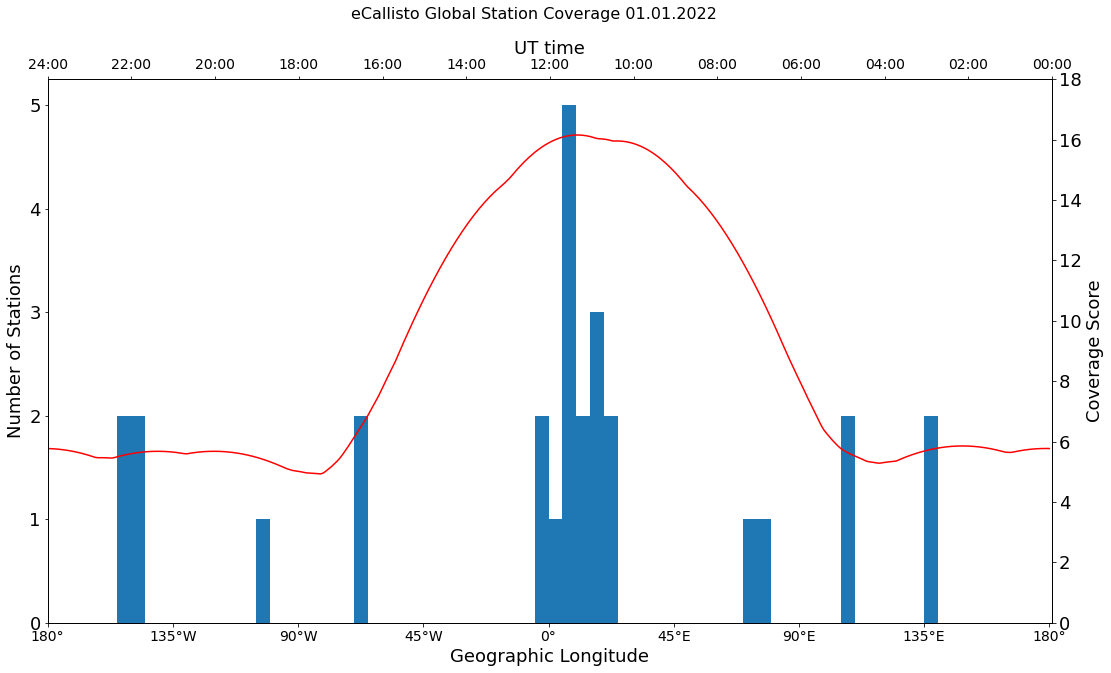

In [7]:
x_min = -180
x_max = 181
x_steps = 5
x_steps_plot = 45
x_hour_min = 24
x_hour_max = -1
x_hour_step = 2
x_steps_plot_hour = x_hour_step * 15
x = [i for i in range(x_min,x_max)]


fig, ax = plt.subplots(figsize=(18,10))
ax2 = plt.twinx(ax)
ax2label = plt.twiny(ax2)
ax.hist(longs, bins=range(x_min,x_max,x_steps))
ax2.plot(x, cov_tot, color="red")

plt.suptitle(f"eCallisto Global Station Coverage {date[2]:02}.{date[1]:02}.{date[0]}")
ax.set_xlabel("Geographic Longitude")
ax.set_ylabel("Number of Stations")
ax2.set_ylabel("Coverage Score")

ax.set_xticks(range(x_min,x_max,x_steps_plot), [f"{abs(i)}°{EV0(i)}" for i in range(x_min,x_max,x_steps_plot)])

ax2label.xaxis.set_ticks_position('top')
ax2label.set_xticks(range(x_min,x_max,x_steps_plot_hour), [f"{i:02}:{0:02}" for i in range(x_hour_min, x_hour_max, -x_hour_step)])
ax2label.set_xlabel("UT time")
ax.set_xlim(x_min,x_max)
ax2.set_ylim(0,18)
plt.savefig(f"station_distribution_{date[0]:04}{date[1]:02}{date[2]:02}.png", transparent=True)
plt.show()

In [8]:
print(len(my_stations))
stations_europe = [i for i in my_stations if -45 < i.longitude < 45]
print(len(stations_europe))

28
15


In [36]:
def covTight(longitude):
    delta = 0.3
    return np.array([max(0, (1+delta)*np.cos(np.pi/180*(i-longitude))-delta) for i in range(-180,181,1)])


In [37]:
cov_tight_tot = sum([covTight(i) for i in longs])

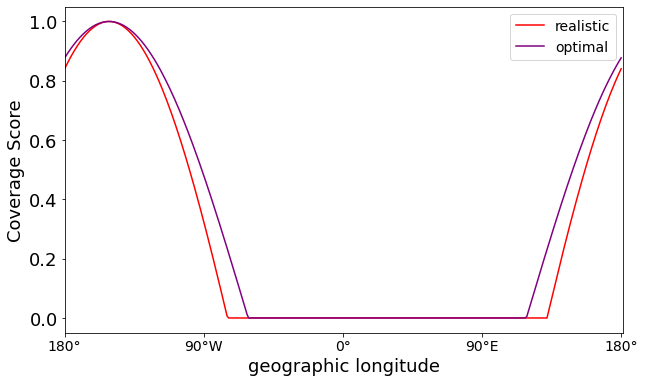

In [38]:
x_min = -180
x_max = 181
x_steps_plot_small = 90
plt.figure(figsize=(10,6))
plt.plot([i for i in range(x_min,x_max)], covTight(longs[0]), color="red", label="realistic")
plt.plot([i for i in range(x_min,x_max)], cov(longs[0]), color="purple", label="optimal")
plt.xlim(x_min,x_max)
plt.xlabel("geographic longitude")
plt.ylabel("Coverage Score")
plt.xticks(range(x_min,x_max,x_steps_plot_small), [f"{abs(i)}°{EV0(i)}" for i in range(x_min,x_max,x_steps_plot_small)])
plt.legend(loc="best")
plt.savefig("station_distribution_20220101_single_-151.png")
plt.show()

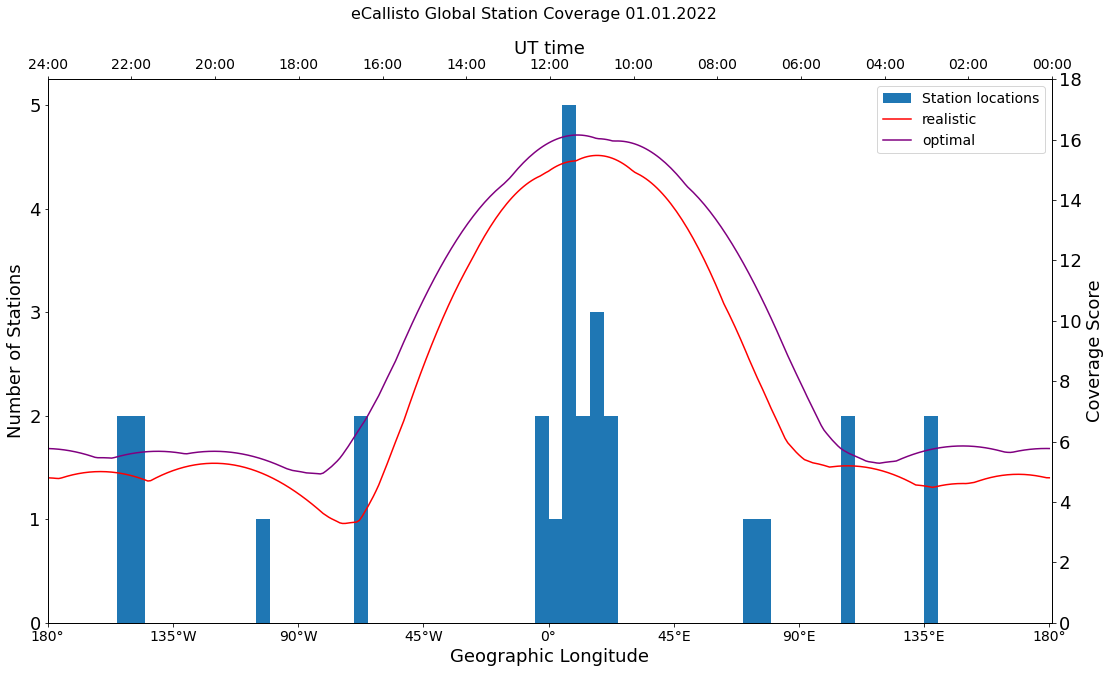

In [39]:
x_min = -180
x_max = 181
x_steps = 5
x_steps_plot = 45
x_hour_min = 24
x_hour_max = -1
x_hour_step = 2
x_steps_plot_hour = x_hour_step * 15
x = [i for i in range(x_min,x_max)]


fig, ax = plt.subplots(figsize=(18,10))
ax2 = plt.twinx(ax)
ax2label = plt.twiny(ax2)
pos = ax.hist(longs, bins=range(x_min,x_max,x_steps), label="Station locations")
real = ax2.plot(x, cov_tight_tot, color="red", label="realistic")
opt = ax2.plot(x, cov_tot, color="purple", label="optimal")

plt.suptitle(f"eCallisto Global Station Coverage {date[2]:02}.{date[1]:02}.{date[0]}")
ax.set_xlabel("Geographic Longitude")
ax.set_ylabel("Number of Stations")
ax2.set_ylabel("Coverage Score")

ax.set_xticks(range(x_min,x_max,x_steps_plot), [f"{abs(i)}°{EV0(i)}" for i in range(x_min,x_max,x_steps_plot)])

ax2label.xaxis.set_ticks_position('top')
ax2label.set_xticks(range(x_min,x_max,x_steps_plot_hour), [f"{i:02}:{0:02}" for i in range(x_hour_min, x_hour_max, -x_hour_step)])
ax2label.set_xlabel("UT time")
ax.set_xlim(x_min,x_max)
ax2.set_ylim(0,18)

labs = [pos[2][0].get_label(),real[0].get_label(),opt[0].get_label()]
plt.legend([pos[2][0],real[0],opt[0]],[labs[0], labs[1], labs[2]], loc="best")

plt.savefig(f"station_distribution_{date[0]:04}{date[1]:02}{date[2]:02}.png", transparent=True)
plt.show()